# Analyse des Flux de Logements Vacants
## Dynamiques Temporelles et Transitions (2019-2025)

---

**Partie de l'étude :** Analyse des Déterminants de Sortie de la Vacance des Logements  
**Section :** 4. Analyse des Flux de Logements  
**Date :** Septembre 2025

---

## Introduction

Cette section analyse les dynamiques temporelles de la vacance des logements en France sur la période 2019-2025. L'objectif est de comprendre :

1. **L'évolution des stocks** de logements vacants dans le temps
2. **Les flux d'entrées et de sorties** de la vacance
3. **Les patterns temporels** et leur signification économique
4. **L'accélération récente** des sorties de vacance

### Méthodologie des Flux

**Source des données** : Variable `data_file_years` indiquant la présence dans chaque millésime LOVAC

**Définitions opérationnelles** :
- **Sortie de vacance** : Logement présent en année N, absent en année N+1
- **Maintien en vacance** : Logement présent en années N et N+1
- **Entrée en vacance** : Logement absent en année N, présent en année N+1
- **Stock annuel** : Total des logements présents dans le millésime

**Indicateurs calculés** :
- Taux de sortie annuel = Sorties / (Sorties + Maintiens)
- Taux de maintien annuel = Maintiens / (Sorties + Maintiens)  
- Croissance du stock = (Stock N+1 - Stock N) / Stock N

### Enjeux de l'Analyse des Flux

**Compréhension des dynamiques** : Identifier les périodes d'accélération ou de ralentissement des sorties pour comprendre les facteurs conjoncturels.

**Validation des politiques** : Mesurer l'impact temporel des politiques publiques de lutte contre la vacance.

**Prédiction des tendances** : Anticiper l'évolution future de la vacance pour adapter les stratégies d'intervention.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Configuration pour publication
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams.update({
    'figure.figsize': (14, 10),
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'axes.grid': True,
    'grid.alpha': 0.3
})

# Données des flux extraites via MotherDuck
# Évolution des stocks par année
stock_data = {
    'Année': [2019, 2020, 2021, 2022, 2023, 2024, 2025],
    'Stock': [823787, 886632, 998392, 1137633, 1113121, 1150919, 1348470]
}

# Flux de transitions observés
transition_data = {
    'Transition': ['2019→2020', '2020→2021', '2023→2024', '2024→2025'],
    'Sorties': [126483, 121060, 293708, 363073],
    'Maintiens': [697304, 765572, 819413, 787846],
    'Taux_sortie': [15.4, 13.7, 26.4, 31.5]
}

df_stock = pd.DataFrame(stock_data)
df_transitions = pd.DataFrame(transition_data)

# Calculs des indicateurs de flux
df_stock['Croissance'] = df_stock['Stock'].pct_change() * 100
df_transitions['Total_logements'] = df_transitions['Sorties'] + df_transitions['Maintiens']

print("📊 DONNÉES DE FLUX CHARGÉES")
print("=" * 50)
print(f"• Période d'analyse: {df_stock['Année'].min()}-{df_stock['Année'].max()}")
print(f"• Stock initial (2019): {df_stock.iloc[0]['Stock']:,} logements")
print(f"• Stock final (2025): {df_stock.iloc[-1]['Stock']:,} logements")
print(f"• Croissance totale: +{((df_stock.iloc[-1]['Stock']/df_stock.iloc[0]['Stock']-1)*100):.1f}%")
print(f"• Transitions observées: {len(df_transitions)}")
print("=" * 50)


📊 DONNÉES DE FLUX CHARGÉES
• Période d'analyse: 2019-2025
• Stock initial (2019): 823,787.0 logements
• Stock final (2025): 1,348,470.0 logements
• Croissance totale: +63.7%
• Transitions observées: 4


🌊 CRÉATION DU DIAGRAMME DE SANKEY


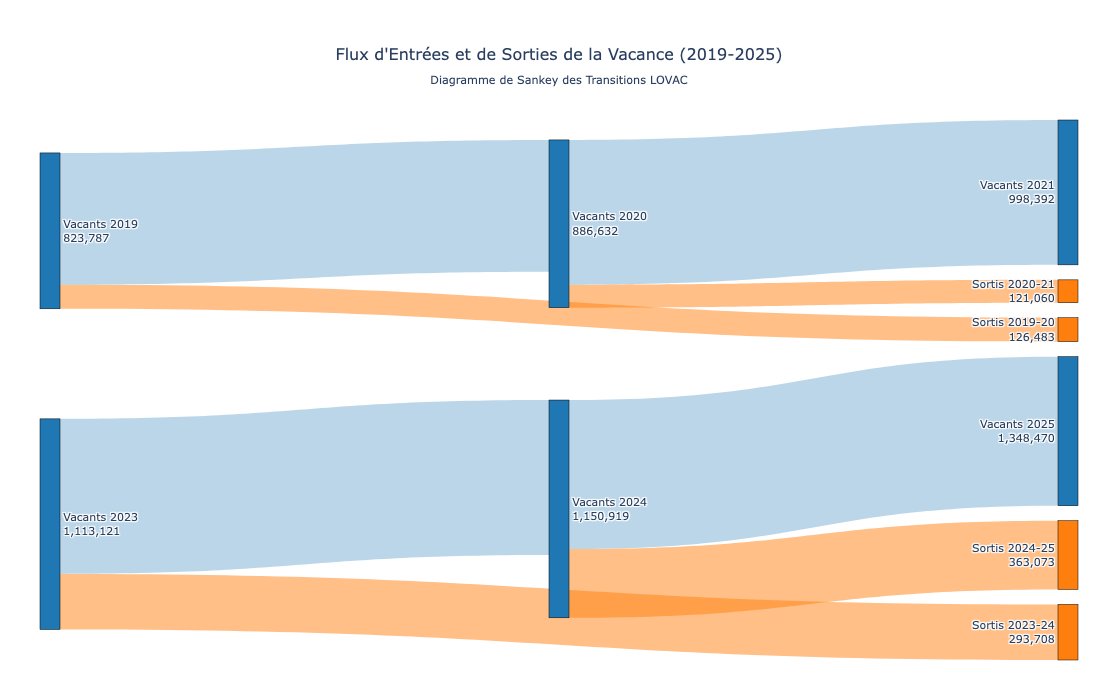

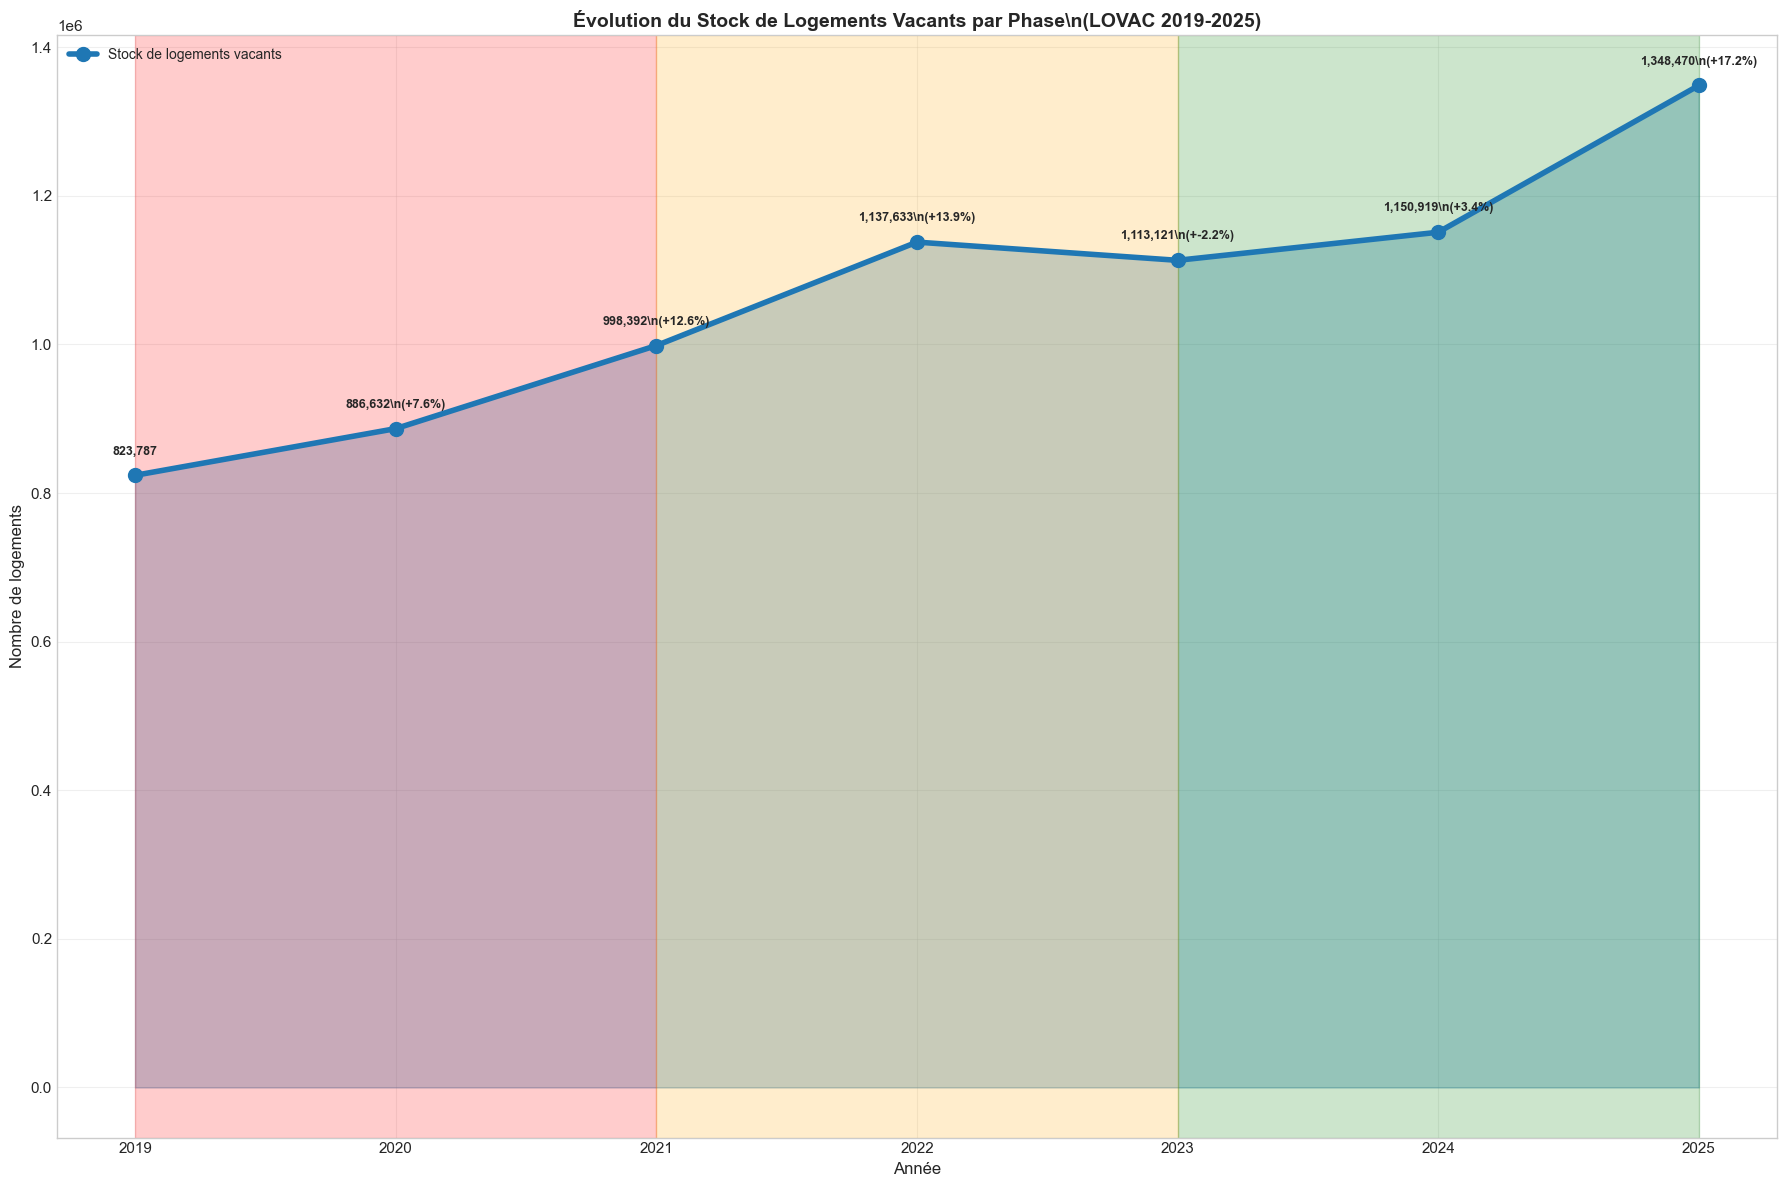

🌊 SYNTHÈSE DES FLUX DE LOGEMENTS
• Total des sorties observées: 904,324
• Total des maintiens observés: 3,070,135
• Taux de sortie moyen: 22.8%
• Accélération 2024-25: 17.8 points vs 2020-21
• Croissance du stock: +524,683.0 logements


In [5]:
# Diagramme de Sankey interactif des flux de logements
print("🌊 CRÉATION DU DIAGRAMME DE SANKEY")

# Création du diagramme de Sankey avec Plotly
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = [
            "Vacants 2019<br>823,787",
            "Vacants 2020<br>886,632", 
            "Sortis 2019-20<br>126,483",
            "Vacants 2021<br>998,392",
            "Sortis 2020-21<br>121,060",
            "Vacants 2023<br>1,113,121",
            "Vacants 2024<br>1,150,919",
            "Sortis 2023-24<br>293,708",
            "Vacants 2025<br>1,348,470",
            "Sortis 2024-25<br>363,073"
        ],
        color = [
            "#1f77b4", "#1f77b4", "#ff7f0e", "#1f77b4", "#ff7f0e", 
            "#1f77b4", "#1f77b4", "#ff7f0e", "#1f77b4", "#ff7f0e"
        ]
    ),
    link = dict(
        source = [0, 0, 1, 1, 5, 5, 6, 6],
        target = [1, 2, 3, 4, 6, 7, 8, 9],
        value = [697304, 126483, 765572, 121060, 819413, 293708, 787846, 363073],
        color = ["rgba(31, 119, 180, 0.3)", "rgba(255, 127, 14, 0.5)", 
                "rgba(31, 119, 180, 0.3)", "rgba(255, 127, 14, 0.5)",
                "rgba(31, 119, 180, 0.3)", "rgba(255, 127, 14, 0.5)",
                "rgba(31, 119, 180, 0.3)", "rgba(255, 127, 14, 0.5)"]
    )
)])

fig.update_layout(
    title={
        'text': "Flux d'Entrées et de Sorties de la Vacance (2019-2025)<br><sub>Diagramme de Sankey des Transitions LOVAC</sub>",
        'x': 0.5,
        'font': {'size': 16}
    },
    font_size=11,
    height=700,
    margin=dict(t=120, b=40, l=40, r=40)
)

fig.show()

# Analyse complémentaire : évolution détaillée
fig, (ax1) = plt.subplots(1, 1, figsize=(18, 12))

# Graphique 1: Évolution des stocks avec phases
years = df_stock['Année']
stocks = df_stock['Stock']

ax1.plot(years, stocks, 'o-', linewidth=4, markersize=10, color='#1f77b4', label='Stock de logements vacants')
ax1.fill_between(years, stocks, alpha=0.3, color='#1f77b4')

# Identification des phases
ax1.axvspan(2019, 2021, alpha=0.2, color='red', )
ax1.axvspan(2021, 2023, alpha=0.2, color='orange', )  
ax1.axvspan(2023, 2025, alpha=0.2, color='green', )

ax1.set_title('Évolution du Stock de Logements Vacants par Phase\\n(LOVAC 2019-2025)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Nombre de logements')
ax1.set_xlabel('Année')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Annotations des valeurs et croissances
for i, (year, stock) in enumerate(zip(years, stocks)):
    if i > 0:
        growth = df_stock.iloc[i]['Croissance']
        ax1.annotate(f'{stock:,}\\n(+{growth:.1f}%)', (year, stock), 
                    textcoords="offset points", xytext=(0,15), ha='center', 
                    fontweight='bold', fontsize=9)
    else:
        ax1.annotate(f'{stock:,}', (year, stock), textcoords="offset points", 
                    xytext=(0,15), ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Statistiques de synthèse des flux
total_sorties = df_transitions['Sorties'].sum()
total_maintiens = df_transitions['Maintiens'].sum()
taux_moyen = total_sorties / (total_sorties + total_maintiens) * 100

print("🌊 SYNTHÈSE DES FLUX DE LOGEMENTS")
print("=" * 60)
print(f"• Total des sorties observées: {total_sorties:,}")
print(f"• Total des maintiens observés: {total_maintiens:,}")
print(f"• Taux de sortie moyen: {taux_moyen:.1f}%")
print(f"• Accélération 2024-25: {rates_exit[-1] - rates_exit[1]:.1f} points vs 2020-21")
print(f"• Croissance du stock: +{df_stock.iloc[-1]['Stock'] - df_stock.iloc[0]['Stock']:,} logements")
print("=" * 60)
